# Regression Assignment

In [ ]:
# 1. What is Simple Linear Regression?
'''
Simple Linear Regression is a statistical and machine learning technique used to model the relationship 
between one independent variable (X) and one dependent variable (Y) by fitting a straight line to the data.
It assumes that the change in the dependent variable is linearly proportional to the change in the independent variable.
Y = B0 + B1X
Y = dependent variable
X = independent variable
B0 = intercept
B1 = slope
Simple Linear Regression finds the best fit straight line that minimizes 
the difference between the actual values and the predicted values.
'''

In [ ]:
# 2. What are the key assumptions of Simple Linear Regression?
'''
The key assumptions of Simple Linear Regression ensure that the model is valid, reliable, and produces unbiased predictions.
These assumptions describe the relationship between the independent variable (X) and the dependent variable (Y) .
1. There must be a linear relationship between the independent variable (X) and the dependent variable (Y) .
2. The errors must be independent of each other.
3. The variance of the residuals should be constant across all values of X.
4. The residuals should be normally distributed, especially important for hypothesis testing and confidence intervals.
5. The dataset should not contain extreme outliers that strongly influence the regression line.
6. The expected value of the error term should be zero, and errors should not be correlated with X.
'''

In [ ]:
# 3. What is heteroscedasticity, and why is it important to address in regression models?
'''
Heteroscedasticity refers to a situation in a regression model where the variance of the error terms
is not constant across all values of the independent variable.
Heteroscedasticity is important to address because it does not bias the regression coefficients, 
but it makes statistical inference unreliable. 
Standard errors become incorrect, which leads to misleading p-values, confidence intervals, and hypothesis tests. 
As a result, we may incorrectly conclude that a variable is significant when it actually isn’t. 
In prediction tasks, heteroscedasticity also reduces the reliability of uncertainty estimates.
'''

In [ ]:
# 4. What is Multiple Linear Regression?
'''
Multiple Linear Regression is an extension of simple linear regression used to model 
the relationship between one dependent variable and two or more independent variables. 
It helps us understand how multiple factors together influence an outcome 
and allows more accurate predictions than using a single predictor.

'''

In [ ]:
# 5. What is polynomial regression, and how does it differ from linear regression?
'''
Polynomial Regression is a type of regression technique used to model a non-linear relationship 
between the independent variable and the dependent variable by transforming the input features into polynomial terms,
while still using a linear regression model internally.
Linear Regression assumes a straight-line relationship between the independent and dependent variables.
It works well only when the relationship is approximately linear.
Polynomial Regression, on the other hand, can capture curved and complex patterns by including higher-degree terms.
This allows the model to fit non-linear trends while still using the linear regression framework.
'''

Slope (m): 1.98
Intercept (c): 0.17999999999999972


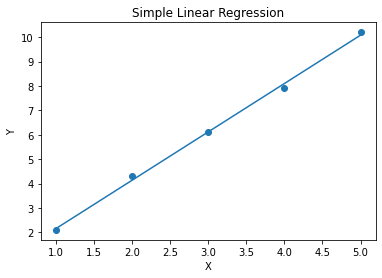

In [1]:
# 6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# X = [1, 2, 3, 4, 5]
# Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.
# (Include your Python code and output in the code box below.)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

x_mean = np.mean(X)
y_mean = np.mean(Y)

m = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean) ** 2)
c = y_mean - m * x_mean

Y_pred = c + m * X

print("Slope (m):", m)
print("Intercept (c):", c)

plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

In [3]:
# 7. Fit a Multiple Linear Regression model on this sample data:
# Area = [1200, 1500, 1800, 2000]
# Rooms = [2, 3, 3, 4]
# Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

df = pd.DataFrame({
    "Area": Area,
    "Rooms": Rooms,
    "Price": Price
})

X = df[["Area", "Rooms"]]
X = sm.add_constant(X) 

y = df["Price"]

model = sm.OLS(y, X).fit()

print("Regression Model Summary:\n")
print(model.summary())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:\n")
print(vif_data)

Regression Model Summary:

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Thu, 18 Dec 2025   Prob (F-statistic):             0.0377
Time:                        18:52:04   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


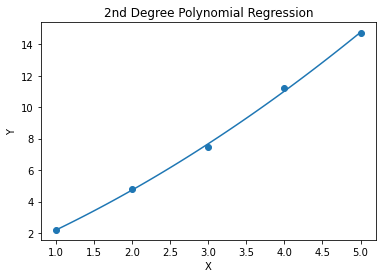

Intercept: 0.06000000000001293
Coefficients: [0.   1.94 0.2 ]


In [4]:
# 8. Implement polynomial regression on the following data:
# X = [1, 2, 3, 4, 5]
# Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd degree polynomial and plot the resulting curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_new = np.linspace(1, 5, 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
Y_pred = model.predict(X_new_poly)

plt.figure()
plt.scatter(X, Y)
plt.plot(X_new, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.show()

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

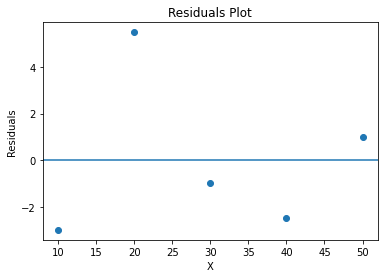

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [5]:
# 9. Create a residuals plot for a regression model trained on this data:
# X = [10, 20, 30, 40, 50]
# Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.figure()
plt.scatter(X, residuals)
plt.axhline(y=0)
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

print("Residuals:", residuals)

In [ ]:
# 10. Imagine you are a data scientist working for a real estate company.
# You need to predict house prices using features like area, number of rooms, and location.
# However, you detect heteroscedasticity and multicollinearity in your regression model.
# Explain the steps you would take to address these issues and ensure a robust model.
'''
To ensure a robust house price prediction model,
I would first diagnose heteroscedasticity and multicollinearity using residual plots and VIF.
Heteroscedasticity can be handled using target transformations, weighted regression, or robust standard errors.
Multicollinearity can be reduced through feature selection, regularization, or dimensionality reduction techniques. 
Finally, cross-validation ensures the model generalizes well to unseen data.
'''